Playing with decision trees

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np

In [2]:
digits = datasets.load_digits()

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(digits.images, digits.target, \
                                                    test_size=.4, random_state=0)
X_train = X_train.reshape(X_train.shape[0],64)
X_test = X_test.reshape(X_test.shape[0],64)

In [3]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [4]:
# oof this is terrible!
expected = y_test
predicted = clf.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (clf, classification_report(expected, predicted, digits=5)))
print("Confusion matrix:\n%s" % confusion_matrix(expected, predicted))

Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'):
             precision    recall  f1-score   support

          0    0.92188   0.98333   0.95161        60
          1    0.81818   0.86301   0.84000        73
          2    0.94828   0.77465   0.85271        71
          3    0.72500   0.82857   0.77333        70
          4    0.88525   0.85714   0.87097        63
          5    0.81928   0.76404   0.79070        89
          6    0.92405   0.96053   0.94194        76
          7    0.87879   0.89231   0.88550        65
          8    0.76667   0.58974   0.66667        78
          9    0.68132   0.83784   0.75152        74

avg / total    0.83362   0.82893   0.82767       719


Confusion 

In [5]:
clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [6]:
param_grid = [
  {'class_weight': ["balanced", None], 'criterion': ['gini', 'entropy'], 
   'max_features': ["auto", "sqrt", "log2", None], 'max_depth': [1, 2, 4, 8, 16, 32, 64]},
 ]

In [7]:
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print '\n'

    clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print '\n'
    print(clf.best_params_)
    print '\n'
    print("Grid scores on development set:")
    print '\n'
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.5f (+/-%0.05f) for %r"
              % (mean, std * 2, params))
    print '\n'

    print("Detailed classification report:")
    print '\n'
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print '\n'
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=5))
    print '\n'

# Tuning hyper-parameters for precision




/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters set found on development set:


{'max_features': None, 'criterion': 'gini', 'max_depth': 16, 'class_weight': 'balanced'}


Grid scores on development set:


0.04287 (+/-0.00696) for {'max_features': 'auto', 'criterion': 'gini', 'max_depth': 1, 'class_weight': 'balanced'}
0.04437 (+/-0.00829) for {'max_features': 'sqrt', 'criterion': 'gini', 'max_depth': 1, 'class_weight': 'balanced'}
0.06067 (+/-0.03211) for {'max_features': 'log2', 'criterion': 'gini', 'max_depth': 1, 'class_weight': 'balanced'}
0.07584 (+/-0.00399) for {'max_features': None, 'criterion': 'gini', 'max_depth': 1, 'class_weight': 'balanced'}
0.17105 (+/-0.03987) for {'max_features': 'auto', 'criterion': 'gini', 'max_depth': 2, 'class_weight': 'balanced'}
0.17202 (+/-0.06585) for {'max_features': 'sqrt', 'criterion': 'gini', 'max_depth': 2, 'class_weight': 'balanced'}
0.16973 (+/-0.08261) for {'max_features': 'log2', 'criterion': 'gini', 'max_depth': 2, 'class_weight': 'balanced'}
0.21338 (+/-0.03327) for

In [8]:
# now let's try some PCA to reduce the dimension and try to get some better predictors

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
nComp = 50
pca = PCA(n_components=nComp)
pca.fit(X_test)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

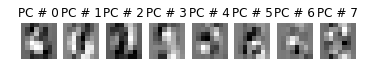

In [11]:
# let's look at the top principal components
nPC = 8
for index in range(nPC):
    plt.subplot(2, nPC, index + 1)
    plt.axis('off')
    plt.imshow(pca.components_[index].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('PC # %i' % index)

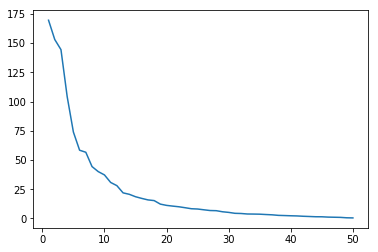

In [12]:
# let's see how much variance we capture with each component
comp_range = range(1,nComp+1)
plt.plot(comp_range,pca.explained_variance_)

From the above plot we see the exponential decay in the explained variance of the model wrt the number of components.  This indicates that much of the information is captured with a much smaller number of pixels than are in the image.  In the numerical analysis parlance, the operator is "effectively low rank" i.e. while the matrix representing the measurements may have full rank, the operator can be well approximated in the spectral norm by an operator of lower rank.  So we can use the orthogonal columns of our PCA matrix as this approximant.  It looks like about 20-30 components are enough to explain most of the variance.

In [ ]:
nComp = 30
pca = PCA(n_components=nComp)
pca.fit(X_test)

X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)
print "reduced training set shape: ", X_train_reduced.shape
print "full training set shape: ", X_train.shape

reduced training set shape:  (1078, 30)
full training set shape:  (1078, 64)


In [ ]:
param_grid = [
  {'class_weight': ["balanced", None], 'criterion': ['gini', 'entropy'], 
   'max_features': ["auto", "sqrt", "log2", None], 'max_depth': [1, 2, 4, 8, 16, 32, 64]},
 ]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print '\n'

    clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train_reduced, y_train)

    print("Best parameters set found on development set:")
    print '\n'
    print(clf.best_params_)
    print '\n'
    print("Grid scores on development set:")
    print '\n'
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.5f (+/-%0.05f) for %r"
              % (mean, std * 2, params))
    print '\n'

    print("Detailed classification report:")
    print '\n'
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print '\n'
    y_true, y_pred = y_test, clf.predict(X_test_reduced)
    print(classification_report(y_true, y_pred, digits=5))
    print '\n'

# Tuning hyper-parameters for precision


Best parameters set found on development set:


{'max_features': None, 'criterion': 'entropy', 'max_depth': 64, 'class_weight': None}


Grid scores on development set:


0.04950 (+/-0.02068) for {'max_features': 'auto', 'criterion': 'gini', 'max_depth': 1, 'class_weight': 'balanced'}
0.04900 (+/-0.01177) for {'max_features': 'sqrt', 'criterion': 'gini', 'max_depth': 1, 'class_weight': 'balanced'}
0.05259 (+/-0.02078) for {'max_features': 'log2', 'criterion': 'gini', 'max_depth': 1, 'class_weight': 'balanced'}
0.05267 (+/-0.00370) for {'max_features': None, 'criterion': 'gini', 'max_depth': 1, 'class_weight': 'balanced'}
0.16419 (+/-0.07703) for {'max_features': 'auto', 'criterion': 'gini', 'max_depth': 2, 'class_weight': 'balanced'}
0.13781 (+/-0.10589) for {'max_features': 'sqrt', 'criterion': 'gini', 'max_depth': 2, 'class_weight': 'balanced'}
0.17033 (+/-0.07535) for {'max_features': 'log2', 'criterion': 'gini', 'max_depth': 2, 'class_weight

So it is interesting that with the reduced training set we don't do any better (and actually a little worse) with our predictions.   Hmmm....

Let's see if we can gain some insigt from the confusion matrix

In [ ]:
expected = y_test
predicted = clf.predict(X_test_reduced)
print("Classification report for classifier %s:\n%s\n"
      % (clf, classification_report(expected, predicted, digits=5)))
print("Confusion matrix:\n%s" % confusion_matrix(expected, predicted))

It seems we do worst on the digits 1, 2, 3, 4, 8 and 9.  Maybe we can use a random forest for boosting to increase our accuracy.  First let's see if the worst classes are underrepresented - the class imbalance may be to explain.

In [ ]:
values, counts = np.unique(y_train, return_counts=True)
print values.T
print counts.T

Not really, they're all in the same ballpark, so it seems to be something else

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.get_params()

In [ ]:
param_grid = [
  {'class_weight': ["balanced", None], 'criterion': ['gini', 'entropy'], 
   'max_features': ["auto", "sqrt", "log2", None], 'max_depth': [1, 2, 4, 8, 16, 32, 64],
   'n_estimators': [2, 4, 8, 16, 32, 64, 10],
  }
 ]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print '\n'

    clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print '\n'
    print(clf.best_params_)
    print '\n'
    print("Grid scores on development set:")
    print '\n'
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.5f (+/-%0.05f) for %r"
              % (mean, std * 2, params))
    print '\n'

    print("Detailed classification report:")
    print '\n'
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print '\n'
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=5))
    print '\n'

This took forever to train, and still isn't that accurate.  Hmmmm.  What if we pair it with PCA?

In [ ]:
nComp = 20
pca = PCA(n_components=nComp)
pca.fit(X_test)

X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)
print "reduced training set shape: ", X_train_reduced.shape
print "full training set shape: ", X_train.shape

param_grid = [
  {'class_weight': ["balanced", None], 'criterion': ['gini', 'entropy'], 
   'max_features': ["auto", "sqrt", "log2", None], 'max_depth': [1, 2, 4, 8, 16],
   'n_estimators': [2, 4, 8, 10, 16],
  }
 ]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print '\n'

    clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train_reduced, y_train)

    print("Best parameters set found on development set:")
    print '\n'
    print(clf.best_params_)
    print '\n'
    print("Grid scores on development set:")
    print '\n'
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.5f (+/-%0.05f) for %r"
              % (mean, std * 2, params))
    print '\n'

    print("Detailed classification report:")
    print '\n'
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print '\n'
    y_true, y_pred = y_test, clf.predict(X_test_reduced)
    print(classification_report(y_true, y_pred, digits=5))
    print '\n'

A lot faster, a little less accurate.  Much to learn!

What if we train a tree just to recognize one class?